In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\karth\\OneDrive\\Desktop\\bank-customer-churn-analysis\\data\\raw\\bank_churn.csv")

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

# 2. One-hot encode categorical columns (Geography, Gender)

df = pd.get_dummies(df, drop_first=True)

df.head()
df.dtypes


CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
Gender_Male             bool
dtype: object

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Features and target
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
pred = rf.predict(X_test)

print(classification_report(y_test, pred))
print("AUC:", roc_auc_score(y_test, pred))


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

AUC: 0.7214231313068938


# Feature importance

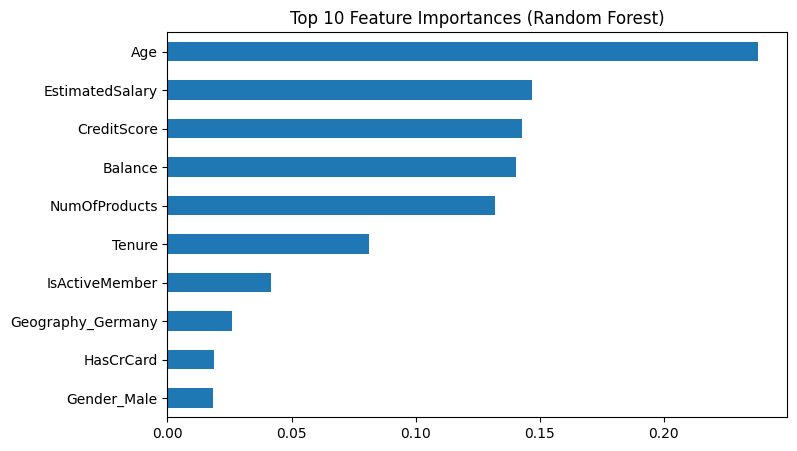

In [4]:
import matplotlib.pyplot as plt
import pandas as pd  

importances = pd.Series(rf.feature_importances_, index=X.columns)
top10 = importances.nlargest(10)

plt.figure(figsize=(8, 5))
top10.plot(kind="barh")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [5]:
# Add churn risk score (probability of exiting)
df["churn_risk_score"] = rf.predict_proba(X)[:, 1]

df[["Exited", "churn_risk_score"]].head()


,Exited,churn_risk_score
0,1,0.285
1,0,0.150
2,1,0.980
3,0,0.135
4,0,0.040


In [6]:
df.to_csv("C:\\Users\\karth\\OneDrive\\Desktop\\bank-customer-churn-analysis\\data\\processed\\churn_predictions.csv", index=False)
